In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [18]:
data = pd.read_csv("xu3_dataset.csv")
test_data_black = pd.read_csv("xu3_blackscholes.csv")

In [19]:
test_data_black

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.450,0.696429,0.036720,0.114195,0.03294,0.0,0.0000,0.0,0.0000,57,61,61,57,56,1500000000
1,3.450,0.462800,0.036720,0.114195,0.03294,0.0,0.0000,0.0,0.0000,57,61,60,57,56,1500000000
2,3.450,0.514800,0.039431,0.114195,0.03294,0.0,0.0000,0.0,0.1875,57,61,60,57,56,1500000000
3,2.905,0.454480,0.039431,0.114195,0.03904,0.0,0.0000,0.0,0.0000,57,61,60,57,56,1500000000
4,2.958,0.454480,0.039431,0.114195,0.03660,0.0,0.0000,0.0,0.0000,57,60,60,57,55,1500000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,3.076,0.496557,0.037638,0.124125,0.03904,0.0,0.0000,0.0,0.0000,61,65,64,61,59,1500000000
1649,3.061,0.537156,0.037638,0.124125,0.03660,0.0,0.1875,0.0,0.0000,61,65,64,61,59,1500000000
1650,3.160,0.475737,0.040392,0.124125,0.03538,0.0,0.0000,0.0,0.0000,61,65,64,61,59,1500000000
1651,3.160,0.475737,0.037638,0.124125,0.03538,0.0,0.0000,0.0,0.0000,61,65,64,61,59,1500000000


In [20]:
data['total_watts'].min()

2.6180000000000003

In [21]:
data['cluster_state'] = np.where(data['w_big'] >= 1, 1, 0)
test_data_black['cluster_state'] = np.where(test_data_black['w_big'] >= 1, 1, 0)

In [22]:
data

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster,cluster_state
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000,0
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,0
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,0
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,0
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,3.844,1.157646,0.039474,0.123132,0.035380,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5411,3.851,1.157646,0.038514,0.123132,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5412,3.851,1.156364,0.041310,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1
5413,3.851,1.158024,0.037638,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,1


In [52]:
Y = data['cluster_state']
y_test = test_data_black['cluster_state']
X = data.drop(['w_big', 'cluster_state', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)
x_test = test_data_black.drop(['w_big', 'cluster_state', 'usage_c4', 'usage_c5', 'usage_c6', 'usage_c7'], axis=1)


### Logistic Regression

In [53]:
model = linear_model.LogisticRegression(penalty = 'none')
model.fit(X, Y)

predictions = model.predict(x_test)

In [54]:
model.score(X, Y)

0.6672206832871653

In [55]:
cm = metrics.confusion_matrix(y_test, predictions)
score = model.score(x_test, y_test)

In [56]:
def con_mat(cm, score):    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

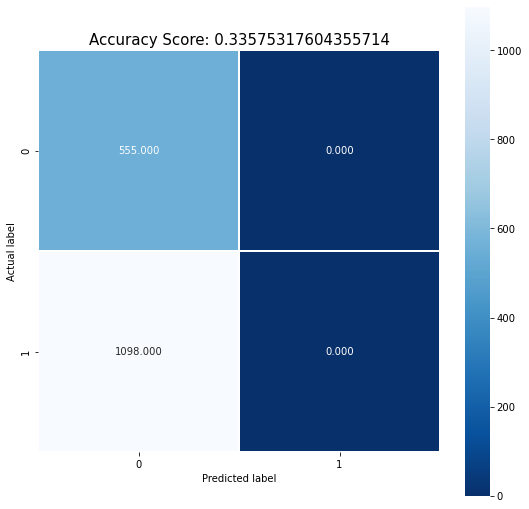

In [57]:
con_mat(cm, score)

### Decision Tree

In [69]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X, Y)
predictions_tree = model_tree.predict(X)

In [70]:
cm_tree = metrics.confusion_matrix(Y, predictions_tree)
score_tree = model_tree.score(X, Y)

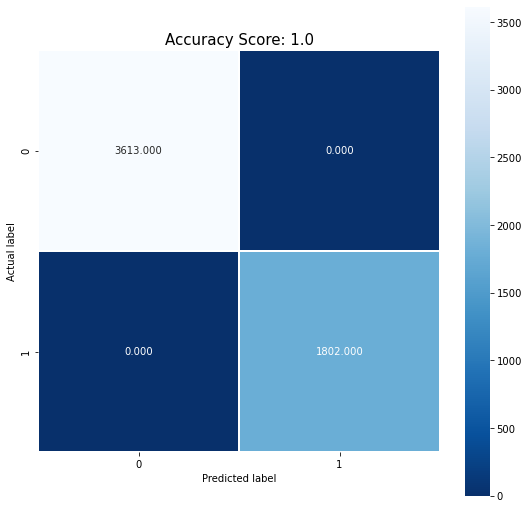

In [71]:
con_mat(cm_tree, score_tree)